# Student Performance Indicator

Life cycle of ML project:
- Understanding the problem statement.
- Data collection
- Data checks to perform
- Exploratoy data analysis
- Data pre-processing
- Model training
- Choose best model

## 1) Problem Statement 

This project understands how the student's performance (test scores) is affected by other variables like Gender, Ethnicity, Parental level of education, Lunch, and Test preparation course.

## 2) Data Collection

- Dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Dataset consists of 8 columns and 1000 rows.

### 2.1) Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as DataFrame

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2) Dataset Information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3) Data Checks to Perform

- Check missing values.
- Check duplicates.
- Check data types.
- Check the number of unique values for each column.
- Check statistics of data set.
- Check various categories present in the different categorical column.

### 3.1) Check Missing Values

In [5]:
df.isna().sum(axis=0)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are no missing values in the data set.

### 3.2) Check Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicate values in the data set.

### 3.3) Check Data Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4) Check the Number of Unique Values of Each Column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5) Check Statistics of Data Set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight

- All means of the feature are close to each other: between 66 and 69.
- All standard deviations are close as well: between 14.6 - 15.2.
- There is a minimun score 0 for math, for reading minimun is higher (10),and for writing is even higher (17).
- In each of the score, the mean is very close to the median: for math 66.1-66.0, for reading 69.2-70.0, and for writing 68.1-69.

### 3.6) Check Categories for Categorical Variables

#### Define Numerical and Categorical Columns

In [ ]:
# Define numerical and categorical columns
numerical_features = df.select_dtypes('int')
categorical_features = df.select_dtypes('object')

# Print column names
print(f"{len(numerical_features.columns)} numerical features: {numerical_features.columns.to_list()}")
print(f"{len(categorical_features.columns)} categorical features: {categorical_features.columns.to_list()}")

4 numerical features: ['math score', 'reading score', 'writing score', 'total score']
5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [36]:
for categorical_feature in df.select_dtypes('object').columns:
    print(f"Categories in '{categorical_feature}' variable:  {df[categorical_feature].unique()}")

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


### 3.7) Adding Targets: 'Total Score' and 'Average' Columns

In [13]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
math_full =  df[ df['math score'] == 100 ]['average'].count()
reading_full =  df[ df['reading score'] == 100 ]['average'].count()
writing_full =  df[ df['writing score'] == 100 ]['average'].count()

print("Number of students with full marks in:")
print(f"\tMath: {math_full}/100")
print(f"\tReading: {reading_full}/100")
print(f"\tWriting: {writing_full}/100")

Number of students with full marks in:
	Math: 7/100
	Reading: 17/100
	Writing: 14/100


In [15]:
math_less_20 = df[ df['math score'] <= 20 ]['average'].count()
reading_less_20 =  df[ df['reading score'] <= 20 ]['average'].count()
writing_less_20 =  df[ df['writing score'] <= 20 ]['average'].count()

print("Number of students with marks less than or equal to 20 in:")
print(f"\tMath: {math_less_20}/100")
print(f"\tReading: {reading_less_20}/100")
print(f"\tWriting: {writing_less_20}/100")

Number of students with marks less than or equal to 20 in:
	Math: 4/100
	Reading: 1/100
	Writing: 3/100


#### Insight

- Students have performed worse in math.
- Best performance in reading.

## 4) Exploratory Data Analysis

### 4.1) Visualize Average Score Distribution

Graphics used:

- Histogram.
- Kernel Distribution Function (KDE).

#### 4.1.1) Histogram and KDE

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


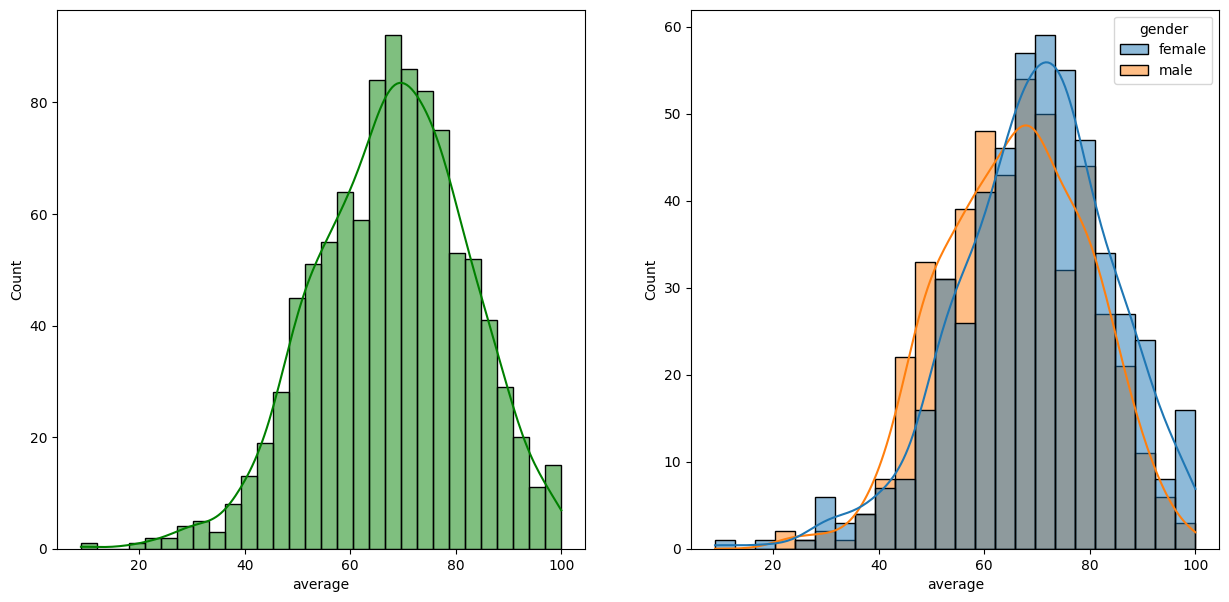

In [17]:
fig , ax = plt.subplots(1, 2, figsize=(15,7))

plt.subplot(1,2,1)
sns.histplot(x='average', bins=30, kde=True, color='g', data=df)

plt.subplot(1,2,2)
sns.histplot(x='average', kde=True, hue='gender', data=df)

plt.show()

##### Insights

- Female students tend to perform better than male students.

In [39]:
categorical_features.columns.to_list()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

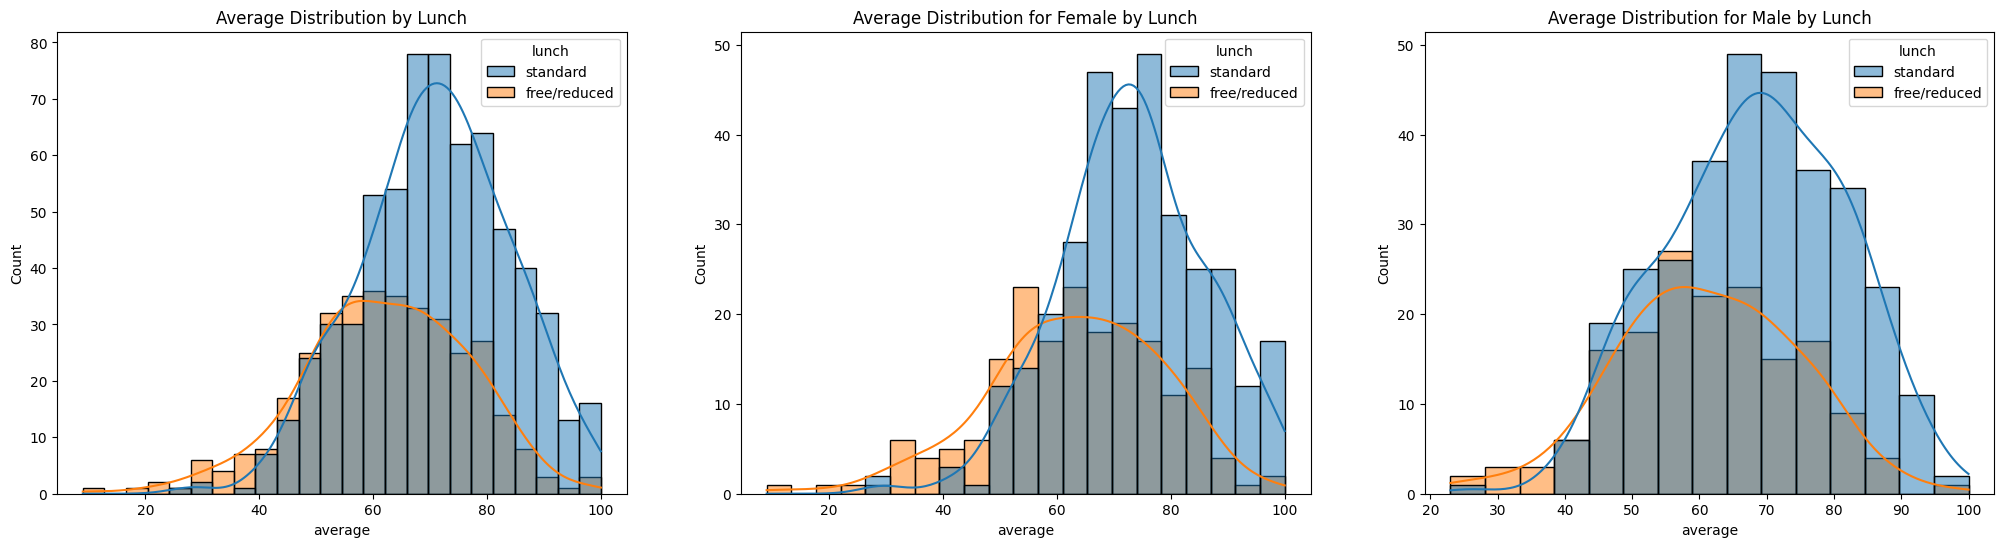

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=ax[0])
ax[0].set_title("Average Distribution by Lunch")

sns.histplot(data=df[ df.gender == 'female'], x='average', kde=True, hue='lunch', ax=ax[1])
ax[1].set_title("Average Distribution for Female by Lunch")

sns.histplot(data=df[ df.gender == 'male'], x='average', kde=True, hue='lunch', hue_order=['standard', 'free/reduced'], ax=ax[2])
ax[2].set_title("Average Distribution for Male by Lunch")


plt.show()

##### Insights

- Standard lunch helps students perform well in exams, for both male and females.

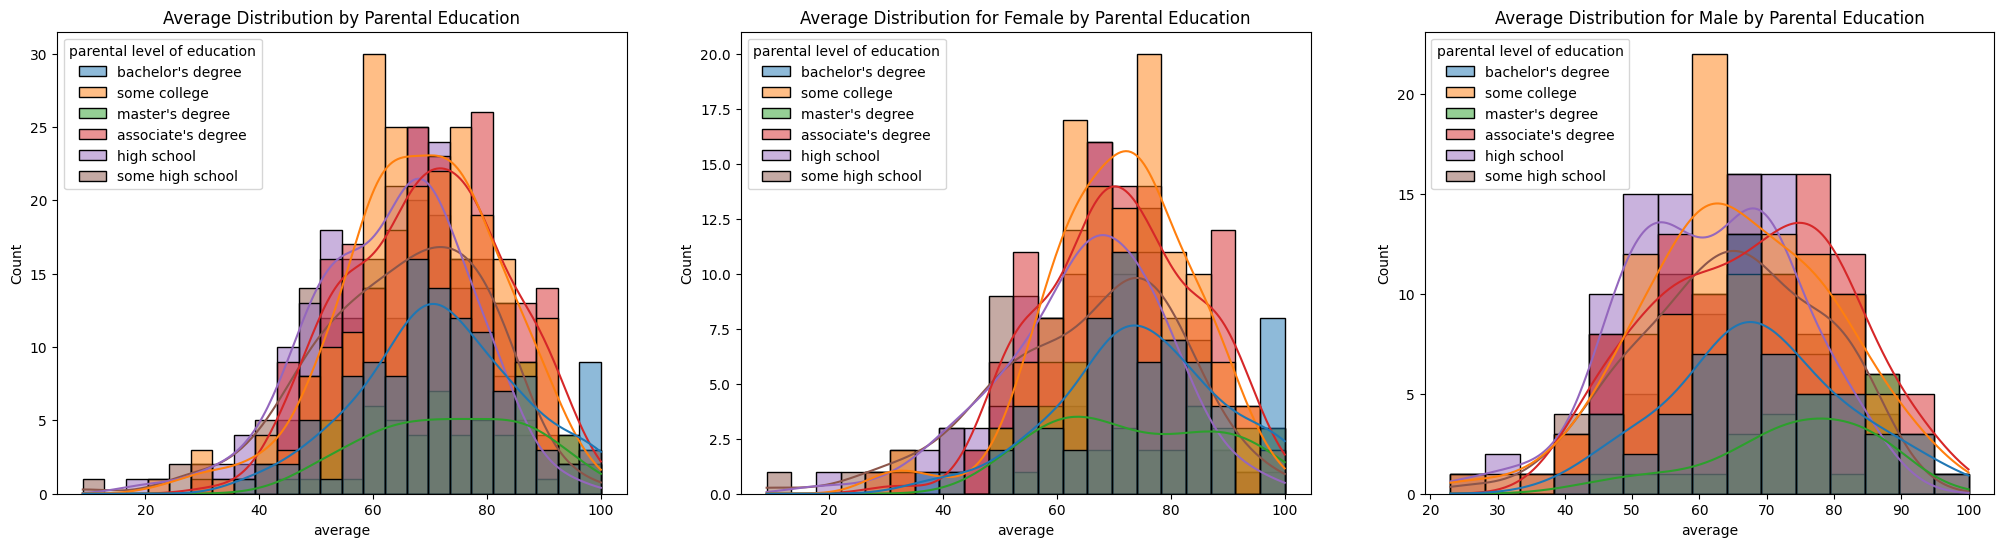

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='parental level of education', ax=ax[0])
ax[0].set_title("Average Distribution by Parental Education")

sns.histplot(data=df[ df.gender == 'female'], x='average', kde=True, hue='parental level of education', ax=ax[1])
ax[1].set_title("Average Distribution for Female by Parental Education")

sns.histplot(data=df[ df.gender == 'male'], x='average', kde=True, hue='parental level of education', hue_order=df['parental level of education'].unique().tolist(), ax=ax[2])
ax[2].set_title("Average Distribution for Male by Parental Education")

plt.show()

In [53]:
sorted(df['race/ethnicity'].unique().tolist())

['group A', 'group B', 'group C', 'group D', 'group E']

Insights

- In general, parent's education doesn't affect students performance in examns.
- From second plot shows there is no affect of parent's education on female students.
- From third plot we can see male students with parents with master's degree and associate's degree tend to perform well in examns.

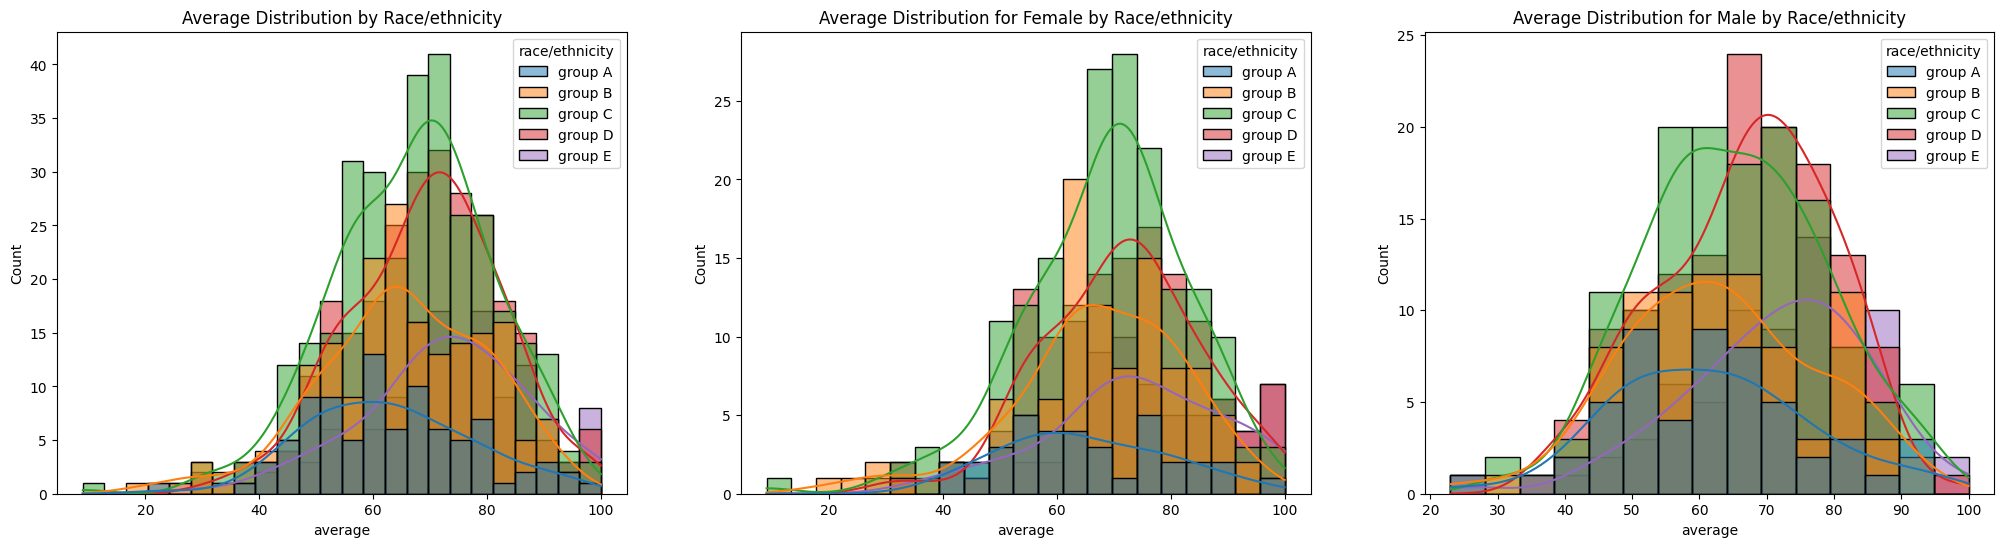

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity', hue_order=sorted(df['race/ethnicity'].unique().tolist()), ax=ax[0])
ax[0].set_title("Average Distribution by Race/ethnicity")

sns.histplot(data=df[ df.gender == 'female'], x='average', kde=True, hue='race/ethnicity', hue_order=sorted(df['race/ethnicity'].unique().tolist()), ax=ax[1])
ax[1].set_title("Average Distribution for Female by Race/ethnicity")

sns.histplot(data=df[ df.gender == 'male'], x='average', kde=True, hue='race/ethnicity', hue_order=sorted(df['race/ethnicity'].unique().tolist()), ax=ax[2])
ax[2].set_title("Average Distribution for Male by Race/ethnicity")

plt.show()

##### Insights

- Students of group A and group B tends to perform worse in the examns than students in other groups.
- Respects to female students, those from group A and B tend to perform worse.
- Respects to male students, those from group A, B, and C tend to perform worse.

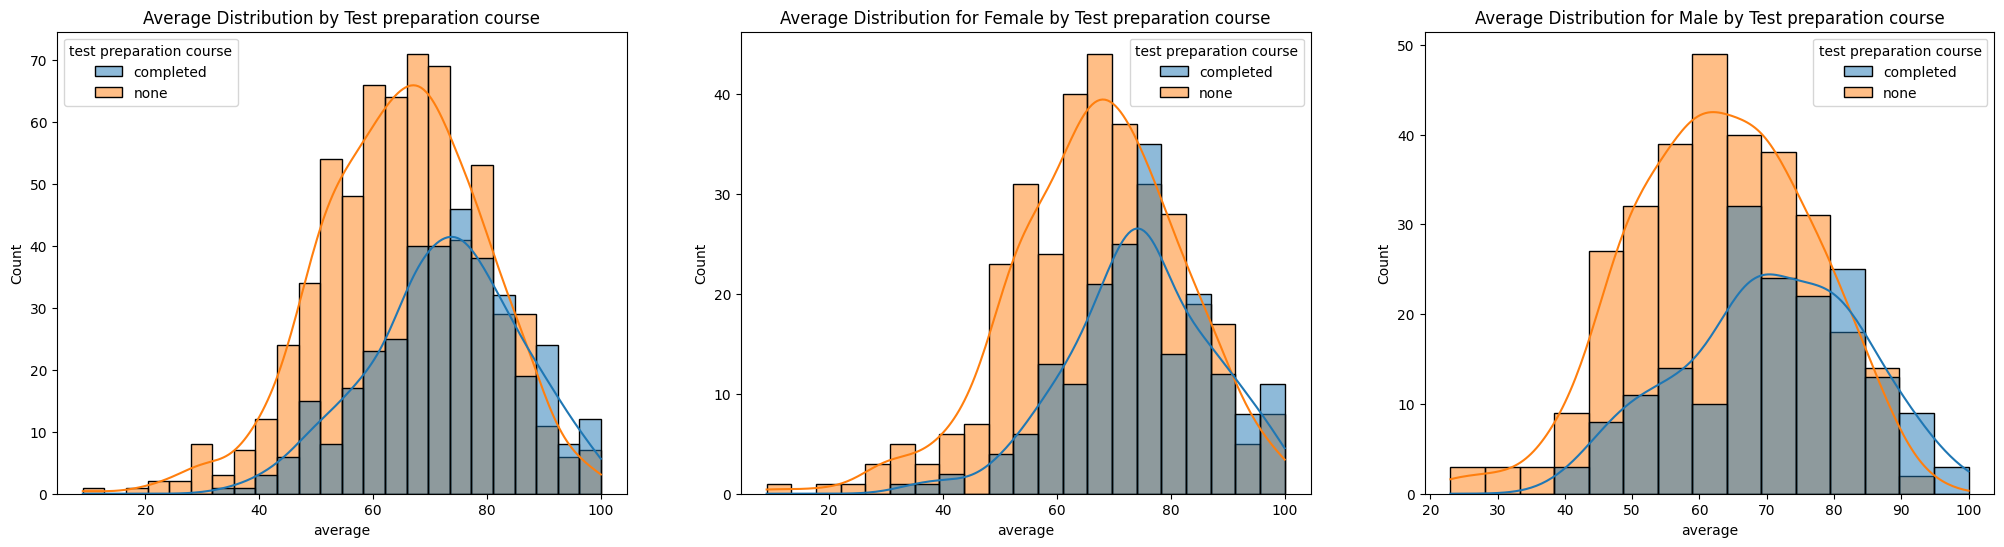

In [81]:
fig, ax = plt.subplots(1, 3, figsize=(25,6))

sns.histplot(data=df, x='average', kde=True, hue='test preparation course', hue_order=sorted(df['test preparation course'].unique().tolist()), ax=ax[0])
ax[0].set_title("Average Distribution by Test preparation course")

sns.histplot(data=df[ df.gender == 'female'], x='average', kde=True, hue='test preparation course', hue_order=sorted(df['test preparation course'].unique().tolist()), ax=ax[1])
ax[1].set_title("Average Distribution for Female by Test preparation course")

sns.histplot(data=df[ df.gender == 'male'], x='average', kde=True, hue='test preparation course', hue_order=sorted(df['test preparation course'].unique().tolist()), ax=ax[2])
ax[2].set_title("Average Distribution for Male by Test preparation course")

plt.show()

##### Insights

- In general and by gender, all students perform better when then completed the test preparation course respect to those who didn't completed it.

### 4.2) Score of Student in All Three Subjects

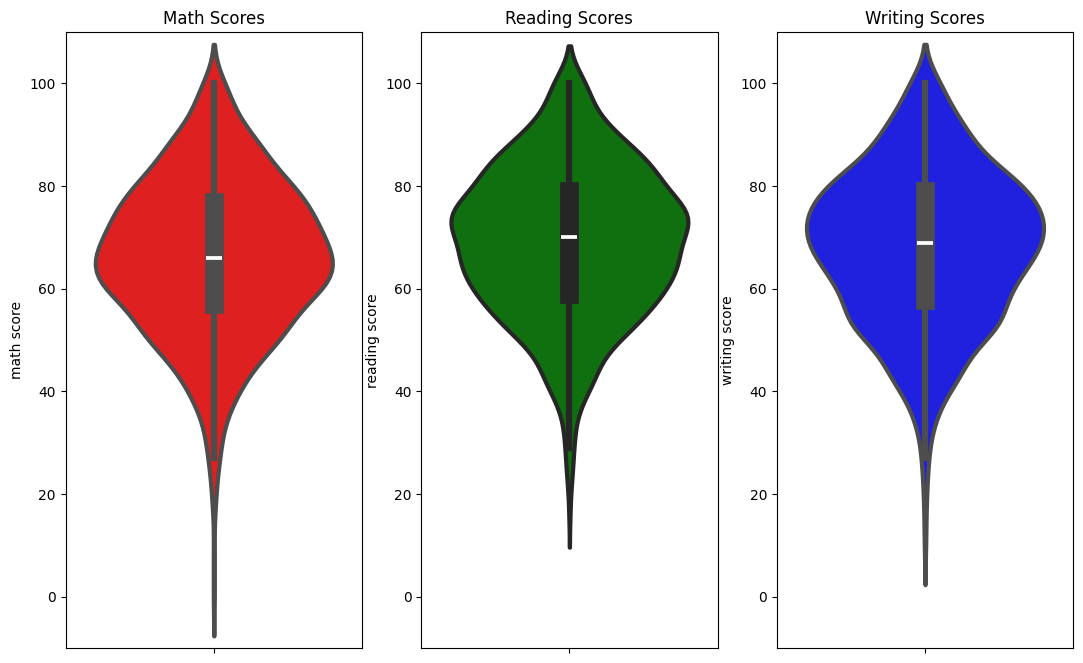

In [ ]:
fig, ax  = plt.subplots(1, 3, figsize=(13,8))

sns.violinplot(data=df, y = 'math score', linewidth=3, color='red', ax=ax[0])
ax[0].set_title('Math Scores')
ax[0].set_ylim(-10,110)
 
sns.violinplot(data=df, y = 'reading score', linewidth=3, color='green', ax=ax[1])
ax[1].set_title('Reading Scores')
ax[1].set_ylim(-10,110)
 
sns.violinplot(data=df, y = 'writing score', linewidth=3, color='blue', ax=ax[2])
ax[2].set_title('Writing Scores')
ax[2].set_ylim(-10,110)
 
plt.show()

#### Insights

- From the three plots its visible that most of the studetns score in between 60-80 in Maths, whereas in Reading and Writing most of them score from 50-80.

### 4.3) Multivariate Analysis using Pieplot

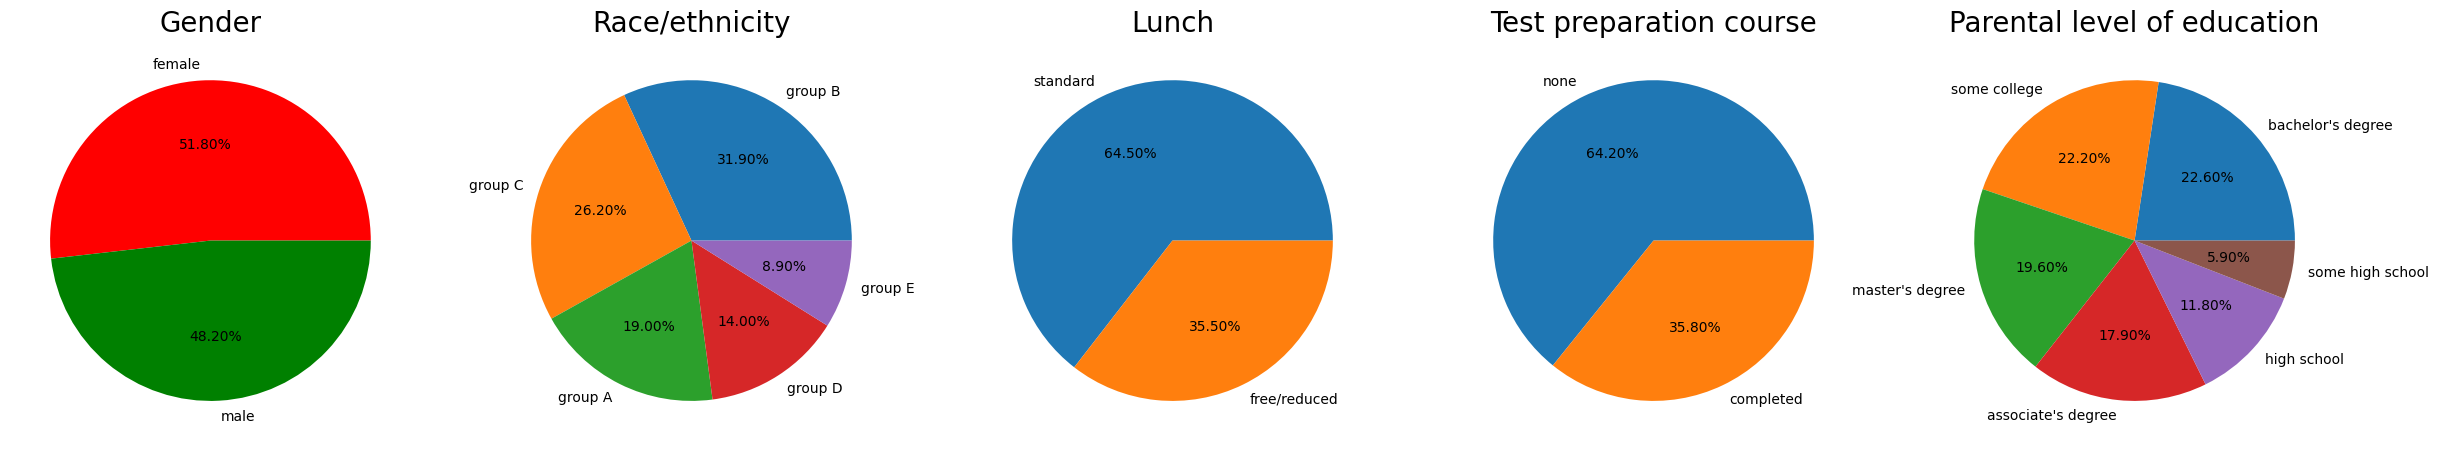

In [97]:
fig, ax = plt.subplots(1, 5, figsize=(30,12))

# Pieplot for Gender
size = df['gender'].value_counts()
labels = df['gender'].unique().tolist()
colors = ['red', 'green']

ax[0].pie(size, colors=colors, labels=labels, autopct='%.2f%%')
ax[0].set_title('Gender', fontsize=20)


# Pieplot for Race/ethnicity
size = df['race/ethnicity'].value_counts()
labels = df['race/ethnicity'].unique().tolist()

ax[1].pie(size, labels=labels, autopct='%.2f%%')
ax[1].set_title('Race/ethnicity', fontsize=20)


# Pieplot for Lunch
size = df['lunch'].value_counts()
labels = df['lunch'].unique().tolist()

ax[2].pie(size, labels=labels, autopct='%.2f%%')
ax[2].set_title('Lunch', fontsize=20)


# Pieplot for Test preparation course
size = df['test preparation course'].value_counts()
labels = df['test preparation course'].unique().tolist()

ax[3].pie(size, labels=labels, autopct='%.2f%%')
ax[3].set_title('Test preparation course', fontsize=20)


# Pieplot for Parental level of education
size = df['parental level of education'].value_counts()
labels = df['parental level of education'].unique().tolist()

ax[4].pie(size, labels=labels, autopct='%.2f%%')
ax[4].set_title('Parental level of education', fontsize=20)


plt.show()

#### Insights

- Number of male and female students are almost identical.
- Number of students are greatest in group B.
- Number of students who have standard lunch are greater.
- Number of students who took the preparation course are lower.
- Number of students whose parents parental level of education is 'some high school' is the lowest. In constrast, for parents with "some college" and "bachelor's degree" the number of students are the greatest.

### 4.4) Feature Wise Visualization

#### 4.4.1) Gender Column

- How is Gender distributed?
- Does gender has any impact on student's performance?

##### Univariate Analysis

How is Gender distributed?

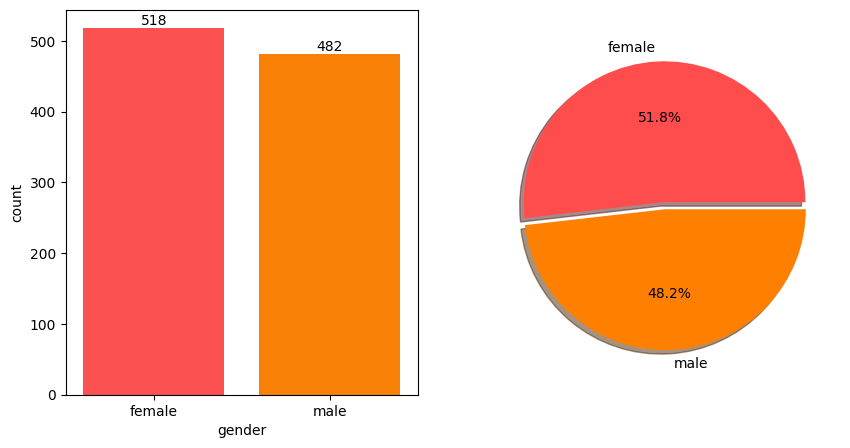

In [160]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

sns.countplot(data=df, x='gender', ax=ax[0], saturation=0.95, palette=['#ff4d4d','#ff8000'])

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)


ax[1].pie(df['gender'].value_counts(), labels=df['gender'].unique().tolist(), explode=[0,0.05], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])

plt.show()

##### Insights
- Distribution of data by gender is balanced: female students with 48% (518) and male students with 52% (482)

##### Bivariate Analysis

- Does gender has any impact on student's performance?

In [137]:
gender_group = df.groupby('gender')

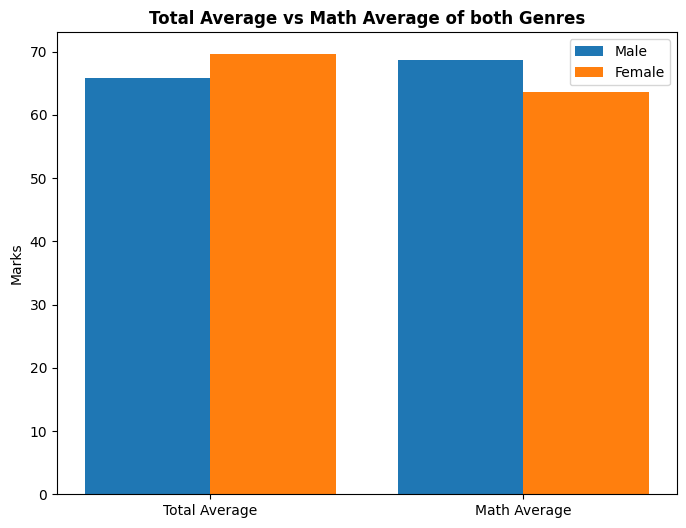

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

X = ['Total Average', 'Math Average']

female_scores = [ gender_group['average'].mean()[0], gender_group['math score'].mean()[0] ]
male_scores = [ gender_group['average'].mean()[1], gender_group['math score'].mean()[1] ]

X_axis = np.arange(len(X))

ax.bar(X_axis - 0.2, male_scores, width=0.4, label='Male')
ax.bar(X_axis + 0.2, female_scores, width=0.4, label='Female')

ax.set_xticks(X_axis, X)
ax.set_ylabel('Marks')
ax.set_title("Total Average vs Math Average of both genders", fontweight='bold')
ax.legend()

fig.show()

##### Insights

- On average females performed better in overall scores.
- For math scores, male performed better.



#### 4.4.2) Race/Ethnicity Column

- How is data distributed respecto to race/ethnicity?
- Does race/ethniticy has any impact on student's performance?

##### Univariate Analysis

- How is data distributed respecto to race/ethnicity?

In [ ]:
df['race/ethnicity'].value_counts()

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: count, dtype: int64

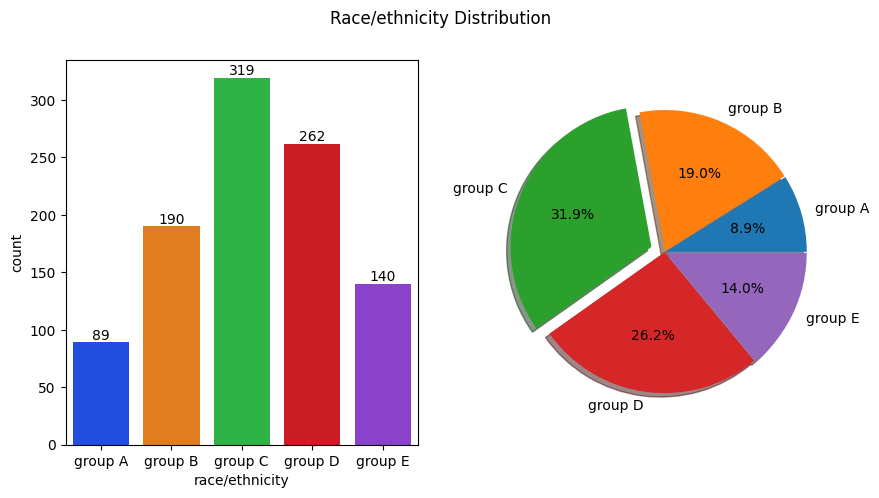

In [176]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

sns.countplot(data=df, x='race/ethnicity', palette='bright', ax=ax[0], order=sorted(df['race/ethnicity'].unique().tolist()))

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10)

ax[1].pie(x=df['race/ethnicity'].value_counts().sort_index(), labels=df['race/ethnicity'].value_counts().sort_index().index, explode=[0.01,0.01,0.1,0.0,0.01], autopct='%1.1f%%', shadow=True)

fig.suptitle('Race/ethnicity Distribution')
fig.show()

##### Insights

- Most students belongs to groups C and D.
- Lowest number of students are inside group A.

##### Bivariate Analysis

- Does race/ethniticy has any impact on student's performance?

In [177]:
group_ethnicity = df.groupby('race/ethnicity')

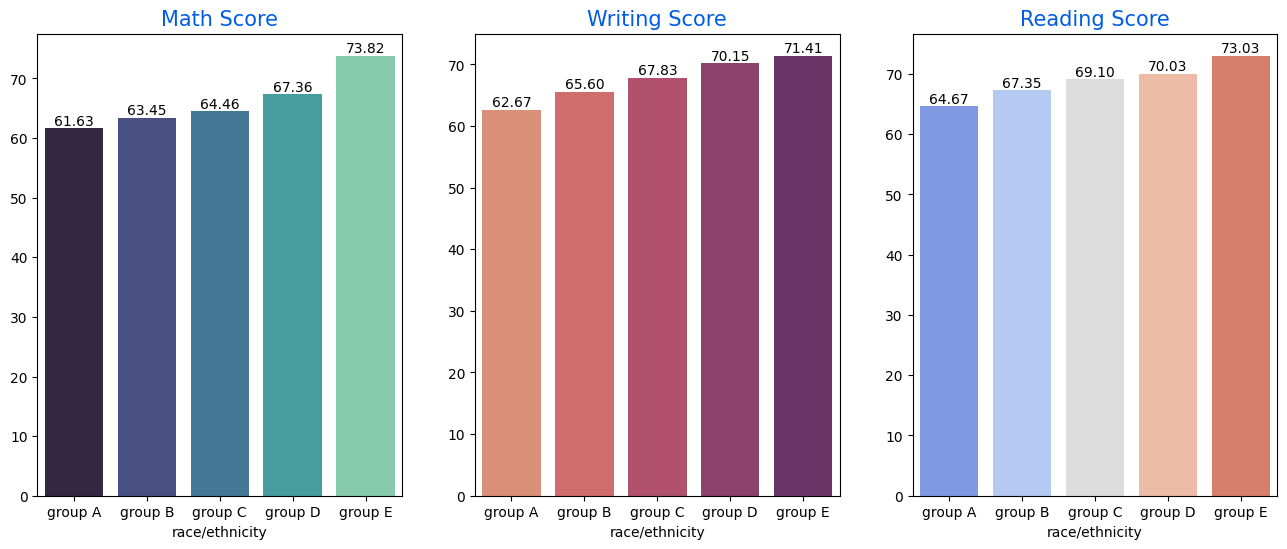

In [201]:
fig, ax = plt.subplots(1, 3, figsize=(16,6))

# Math Average Scores
sns.barplot(x=group_ethnicity['math score'].mean().index, y=group_ethnicity['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=15)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=10, fmt='{:.2f}')


# Writing Average Scores
sns.barplot(x=group_ethnicity['writing score'].mean().index, y=group_ethnicity['writing score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Writing Score', color='#005ce6', size=15)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=10, fmt='{:.2f}')


# Reading Average Scores
sns.barplot(x=group_ethnicity['reading score'].mean().index, y=group_ethnicity['reading score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Reading Score', color='#005ce6', size=15)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=10, fmt='{:.2f}')



fig.show()


##### Insights

- Students from group E have scored the highest marks.
- Students from group A have scored the highest lowest.
- Students from a lower socioeconomic status then have lower average marks in all course subjets.

#### 4.4.3) Parental Level of Education Column

- What is education background of student's parents?
- Does parental level of education has any impact on student's performance?

##### Univariate Analysis

What is education background of student's parents?

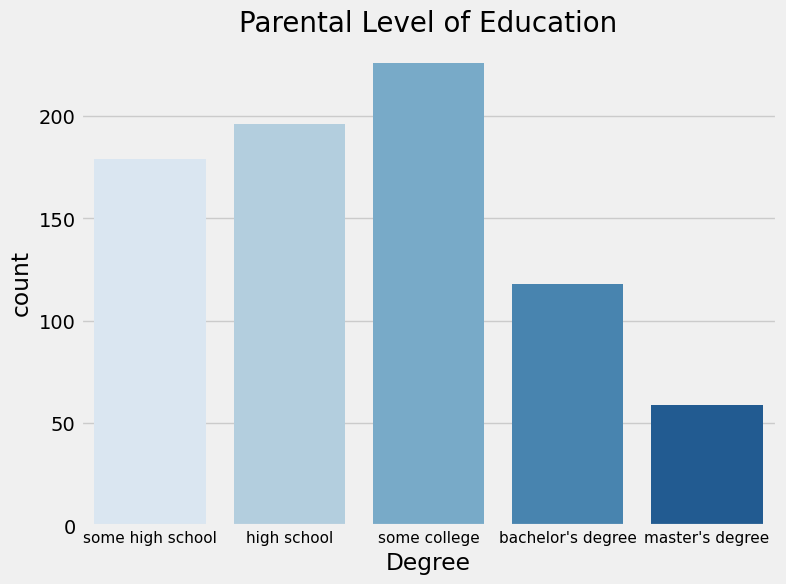

In [223]:
plt.rcParams['figure.figsize'] = (8,6)
plt.style.use('fivethirtyeight')

sns.countplot(x=df['parental level of education'], palette='Blues', order=['some high school', 'high school', 'some college', "bachelor's degree", "master's degree"])
plt.title('Parental Level of Education', fontdict={'fontweight': 30, 'fontsize': 20})
plt.xlabel('Degree')
plt.tick_params(axis='x', labelsize=11)

plt.show()

##### Insights

- Most of students have parents with some college.


##### Bivariate Analysis

- Does parental level of education has any impact on student's performance?

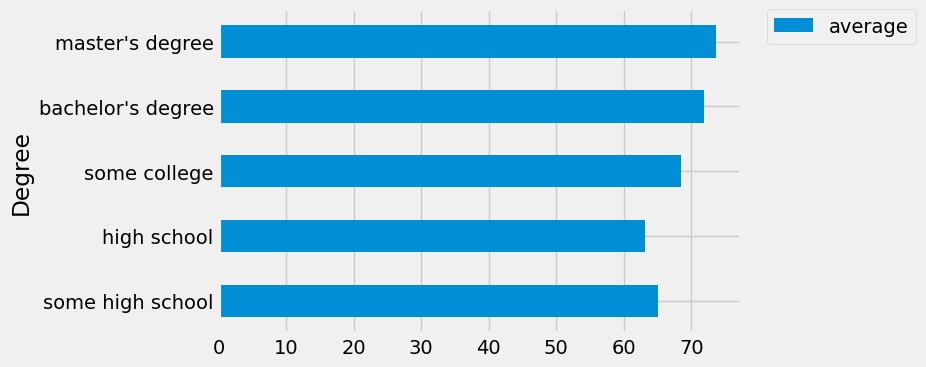

In [ ]:
order = ['some high school', 'high school', 'some college', "bachelor's degree", "master's degree"]
df.groupby('parental level of education')['average'].agg('mean').reindex(order).plot(kind='barh', figsize=(6,4))

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.ylabel('Degree')
plt.show()

##### Insights

- Students whose parents have master's degree perform better in average, followed by parents with bachelor's degree.

#### 4.4.4) Lunch Column

- Which type of lunch is most common among students?
- What is the effect of lunch type on test results?

##### Univariate Analysis

- Which type of lunch is most common among students?


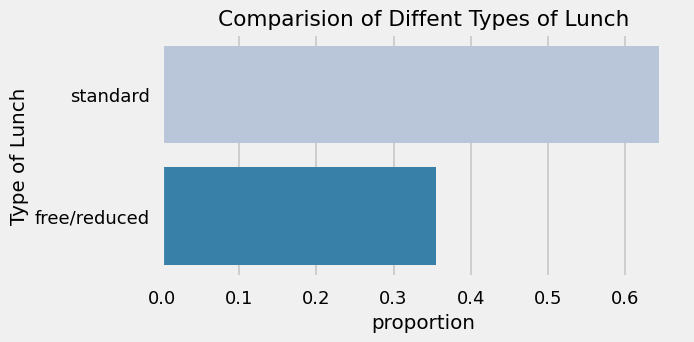

In [350]:
plt.rcParams['figure.figsize'] = (6,3)
# plt.style.use('seaborn-talk')

sns.countplot(df['lunch'], palette='PuBu', stat='proportion')

plt.title('Comparision of Diffent Types of Lunch')
plt.ylabel('Type of Lunch')
plt.show()

##### Insights

- Students having standard lunch are most common.

##### Bivariate Analysis



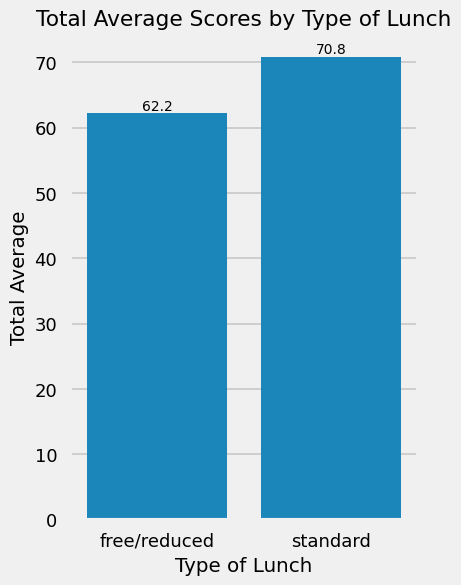

In [284]:
fig, ax = plt.subplots(1,1, figsize=(4,6))

sns.barplot(x=df.groupby('lunch')['average'].mean().index, y=df.groupby('lunch')['average'].mean().values, ax=ax)

for container in ax.containers:
    ax.bar_label(container, size=10, fmt='{:.1f}')

ax.set_xlabel('Type of Lunch')
ax.set_ylabel('Total Average')
ax.set_title('Total Average Scores by Type of Lunch')

fig.show()

##### Insight

- Students who take standard lunch have higher average marks than those who got free/reduced lunch.

#### 4.4.5) Test Preparation Course Column

- How much students takes the test preparation course?
- Does the test preparation course has some impact on student's performance?

##### Univariate Analysis

- How much students takes the test preparation course?

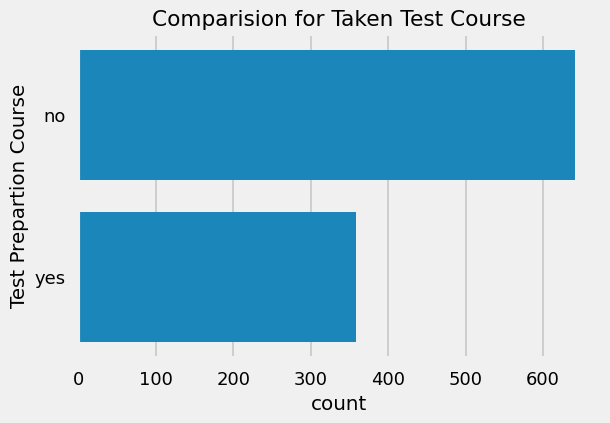

In [309]:
plt.rcParams['figure.figsize'] = (6,4)
sns.countplot(data=df, y='test preparation course')

plt.ylabel("Test Prepartion Course")
plt.yticks(ticks=[0,1], labels=['no', 'yes'])
plt.title('Comparision for Taken Test Course')

plt.show()

##### Insight 

- Most students didn't take the test preparation course.

##### Bivariate Analysis

- Does the test preparation course has some impact on student's performance?

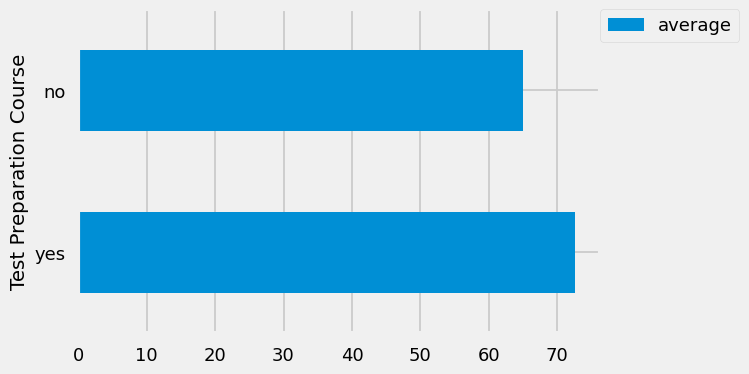

In [ ]:
plt.figure(figsize=(6,4))
df.groupby('test preparation course')['average'].mean().plot(kind='barh', ylabel='Test Preparation Course')

plt.yticks([0,1], ['yes', 'no'])

plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)

plt.show()

##### Insights

- Students who took the test prepartion course performed better on average that those who didn't.

#### 4.4.6) Checking Outliers

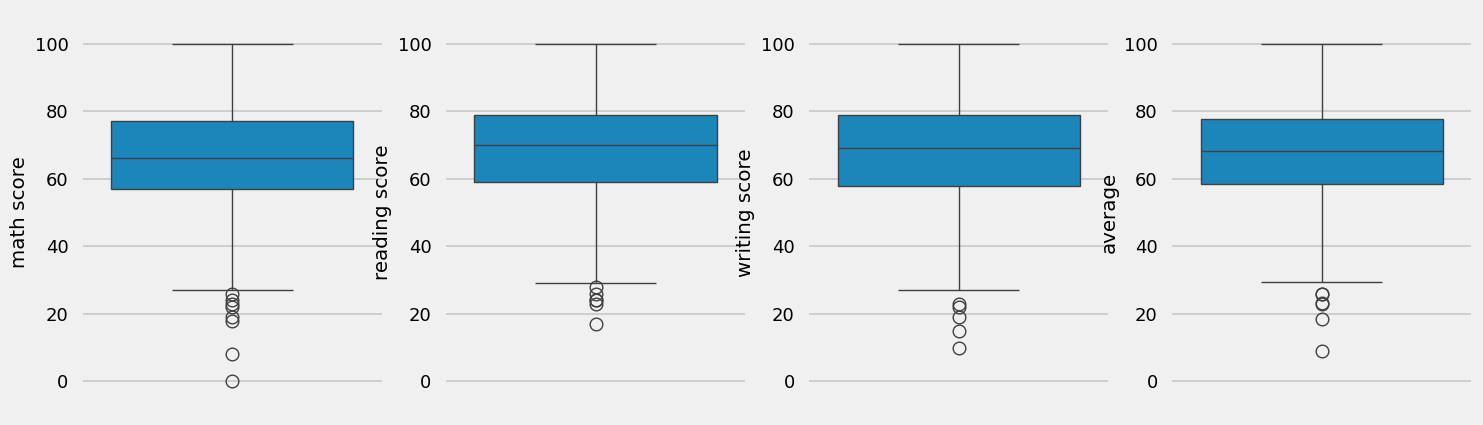

In [339]:
fig, ax = plt.subplots(1, 4, figsize=(16,5))

sns.boxplot(data=df, y='math score', ax=ax[0])
ax[0].set_ylim(-10,110)

sns.boxplot(data=df, y='reading score', ax=ax[1])
ax[1].set_ylim(-10,110)

sns.boxplot(data=df, y='writing score', ax=ax[2])
ax[2].set_ylim(-10,110)

sns.boxplot(data=df, y='average', ax=ax[3])
ax[3].set_ylim(-10,110)

plt.show()

#### 4.4.7) Multivariate Analysis Using Pairlot

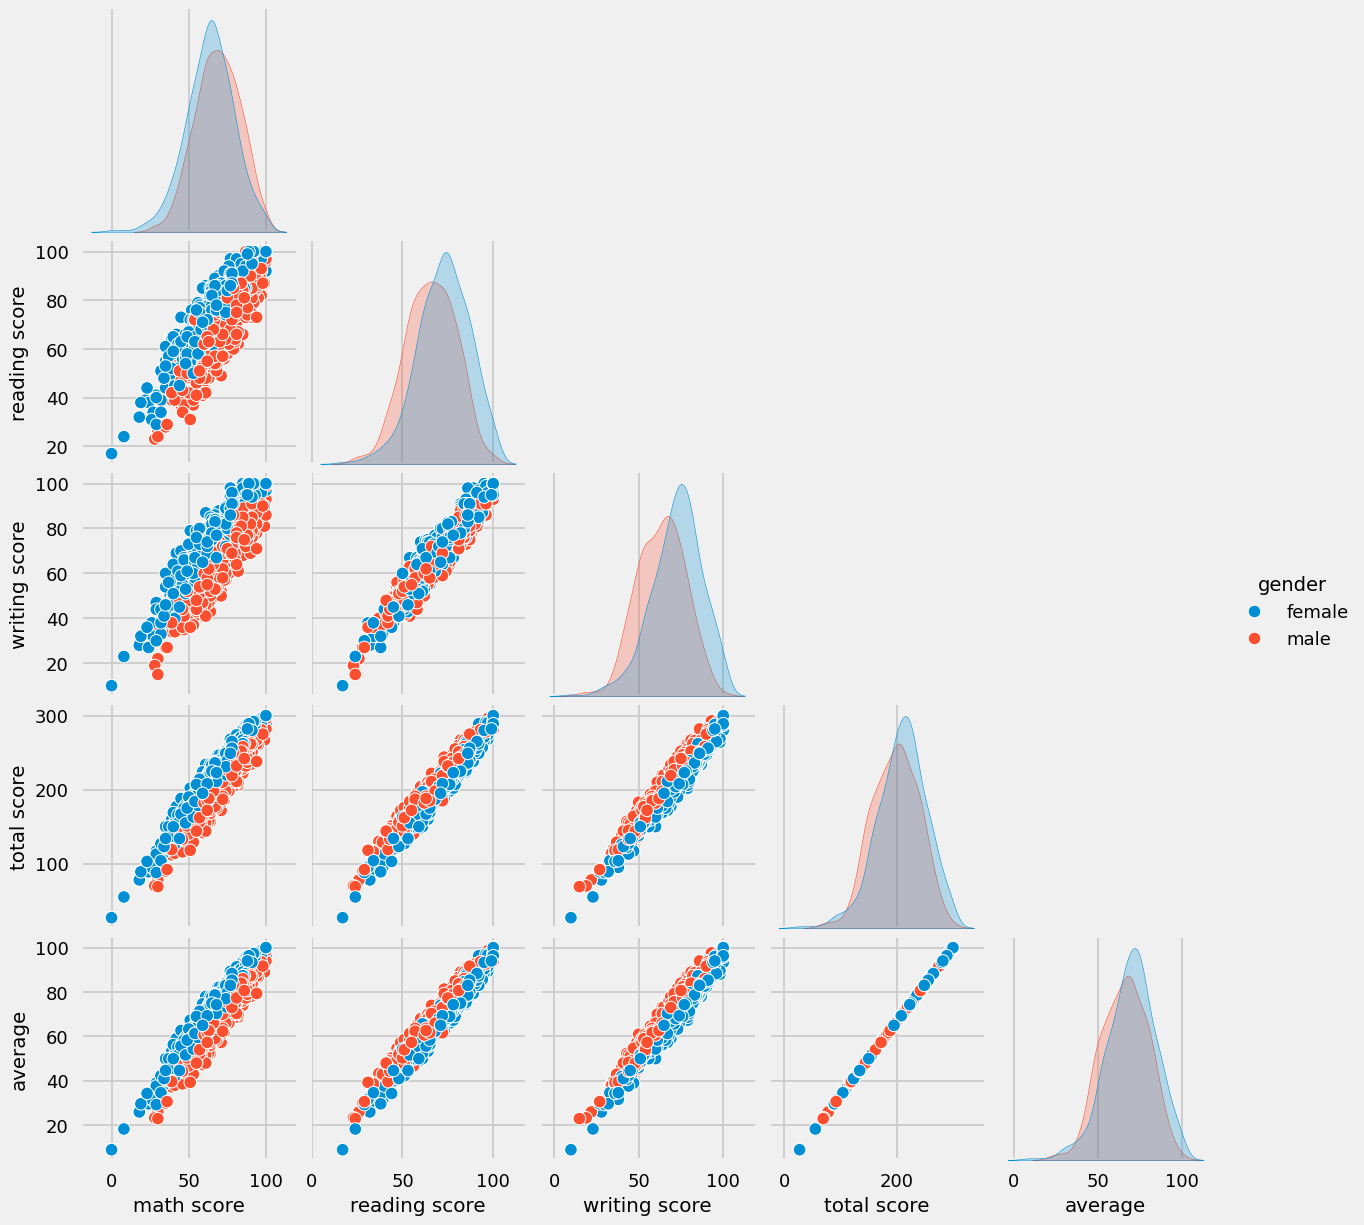

In [349]:
plt.rcParams['figure.figsize'] = (16,10)
sns.pairplot(data=df, hue='gender', corner=True)

plt.show()

##### Insight

- All scores increase linearly with each other.

## 5) Conclusions

- Student's performance is related with lunch, race.
- Female students are top-scores on average.
- Student's performance is not much related with test preparation course.
- The three subject scores are linearly related with each other.